In [344]:
import pandas as pd
import seaborn as sns

# Importing the csv
influencer_data = pd.read_csv(r"Top_Influencers.csv")

influencer_data.head()
# print(influencer_data)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [345]:
# Drop unnecessary columns
influencer_data.drop(["Rank", "Channel Info", "60-Day Eng Rate", "New Post Avg. Likes", "Country Or Region"], axis=1, inplace=True)
influencer_data.head()

,Influence Score,Followers,Avg. Likes,Posts,Total Likes
0,92,485.2m,8.7m,3.4k,29.1b
1,91,370.7m,8.2m,7.0k,57.4b
2,90,363.9m,6.7m,915,6.1b
3,93,348.8m,6.1m,1.9k,11.4b
4,91,339.4m,1.8m,6.8k,12.6b


In [346]:
# Handle null values
influencer_data.isnull().values.any()


# Convert all values to numbers
multiplier = {'k': 10e2, 'm': 10e5, 'b': 10e8}
convert = lambda x : int(float(x[:-1]) * multiplier[x[-1]])

for x in influencer_data:
    influencer_data[x] = influencer_data[x].replace({'k':'*1e3','m':'*1e6','b':'*1e9'}, regex=True).map(pd.eval).astype("int64")


# from numpy import int64
# def update(i, column):
#     try:
#         influencer_data.at[i, column] = int(influencer_data.at[i, column])
#     except:
#         influencer_data.at[i, column] = convert(influencer_data.at[i, column])
#     finally:
#         influencer_data.at[i, column] = int64(influencer_data.at[i, column])

# for i in range(0, influencer_data.shape[0]):
#     update(i, "Influence Score")
#     update(i, "Followers")
#     update(i, "Avg. Likes")
#     update(i, "Posts")
#     update(i, "Total Likes")

In [347]:
print(influencer_data.head())

   Influence Score  Followers  Avg. Likes  Posts  Total Likes
0               92  485200000     8700000   3400  29100000000
1               91  370700000     8199999   7000  57400000000
2               90  363900000     6700000    915   6100000000
3               93  348800000     6100000   1900  11400000000
4               91  339400000     1800000   6800  12600000000


In [348]:
# DATA ANALYSIS
print(influencer_data.describe(include="all"))

       Influence Score     Followers    Avg. Likes         Posts   Total Likes
count       200.000000  2.000000e+02  2.000000e+02    200.000000  2.000000e+02
mean         81.850000  7.849100e+07  1.785050e+06   3460.425000  3.644949e+09
std           8.875323  7.492015e+07  2.192133e+06   3327.882197  5.563069e+09
min          22.000000  3.340000e+07  6.350000e+04     20.000000  2.280000e+07
25%          80.000000  4.067500e+07  4.990500e+05    938.250000  1.075000e+09
50%          84.000000  5.095000e+07  1.100000e+06   2100.000000  2.050000e+09
75%          86.000000  7.050000e+07  2.125000e+06   5025.000000  4.025000e+09
max          93.000000  4.852000e+08  1.540000e+07  16900.000000  5.740000e+10


In [349]:
# CORRELATION COEFFICIENT
influencer_data.corr(method="pearson")

,Influence Score,Followers,Avg. Likes,Posts,Total Likes
Influence Score,1.000000,0.365428,0.048502,0.168287,0.234987
Followers,0.365428,1.000000,0.346829,0.069171,0.667546
Avg. Likes,0.048502,0.346829,1.000000,-0.348795,0.361296
Posts,0.168287,0.069171,-0.348795,1.000000,0.232038
Total Likes,0.234987,0.667546,0.361296,0.232038,1.000000


<AxesSubplot:xlabel='Followers', ylabel='Influence Score'>

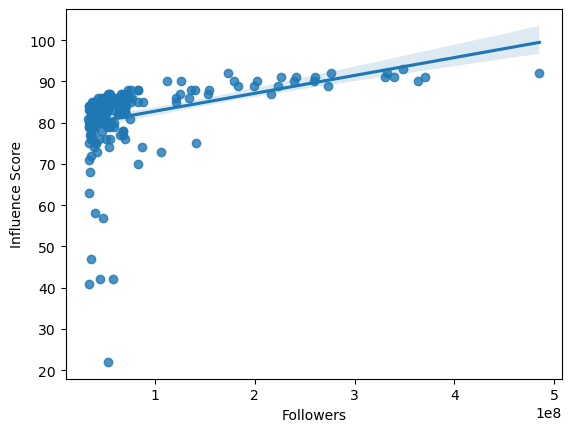

In [350]:
# QUESTION 1
sns.regplot(data=influencer_data, x="Followers", y="Influence Score")

<AxesSubplot:xlabel='Avg. Likes', ylabel='Influence Score'>

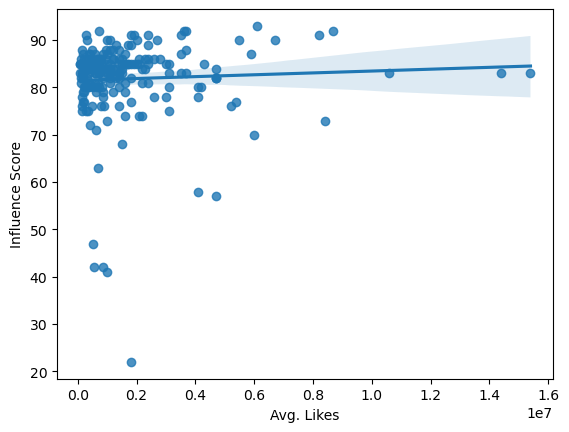

In [351]:
# Question 2
sns.regplot(data=influencer_data, x="Avg. Likes", y="Influence Score")

<AxesSubplot:xlabel='Total Likes', ylabel='Influence Score'>

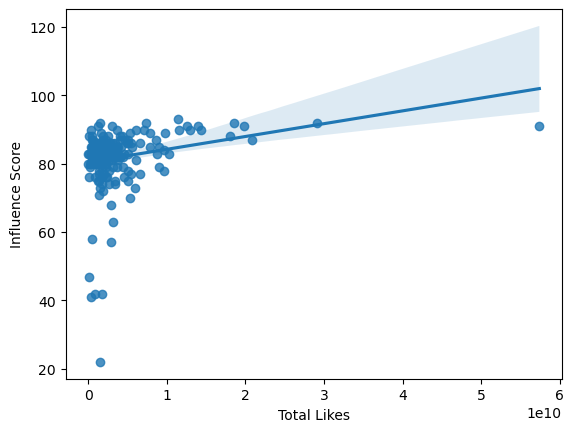

In [352]:
# Question 3
sns.regplot(data=influencer_data, x="Total Likes", y="Influence Score")

<AxesSubplot:xlabel='Posts', ylabel='Influence Score'>

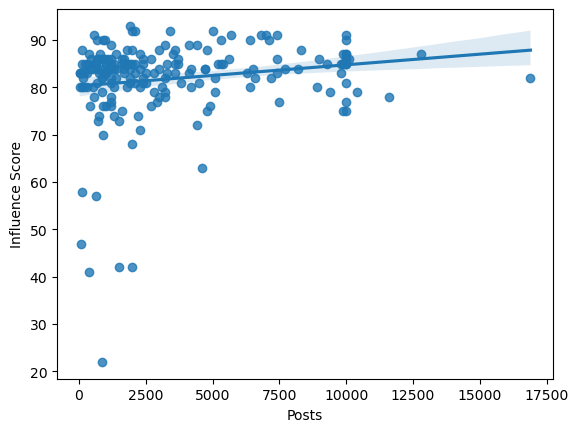

In [353]:
# Question 3
sns.regplot(data=influencer_data, x="Posts", y="Influence Score")